<a href="https://colab.research.google.com/github/KauaHenSilva/python_ocr_and_tesseract/blob/main/text_recognition_in_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instalando o Tesseract

Documentação: https://pypi.org/project/pytesseract/

In [13]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [14]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

### Reconhecimento de texto

In [15]:
from google.colab import drive
# drive: https://drive.google.com/drive/folders/1EUdRpr5YXNgffO9qg4pY0243__Tz5PQC?usp=drive_link
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


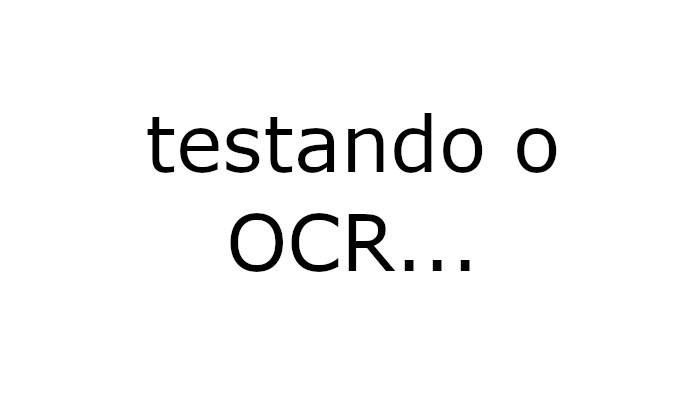

In [16]:
img = cv2.imread('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/teste01.jpg')
cv2_imshow(img) # BGR -> RGB

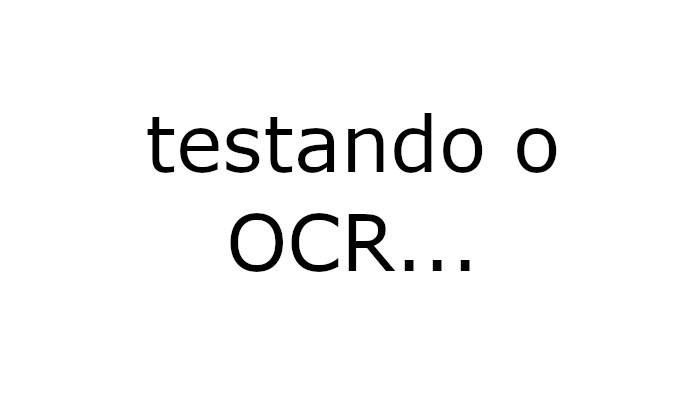

In [17]:
imagem = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(imagem)

In [18]:
texto = pytesseract.image_to_string(imagem)
print(texto)

testando o
OCR...



### Suporte para o português

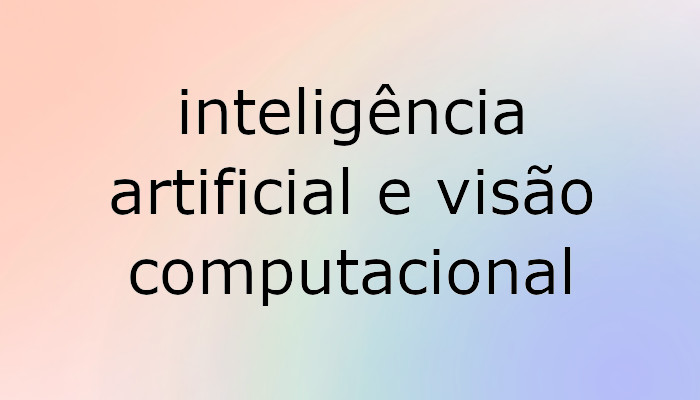

In [19]:
img = cv2.imread('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/teste02.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [20]:
text = pytesseract.image_to_string(img)
print(text)

inteligéncia
artificial e visao
computacional



In [21]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [22]:
!apt-get install -y tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-por is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [23]:
text = pytesseract.image_to_string(img, lang='por')
print(text)

inteligência
artificial e visão
computacional



### Suporte para portugues 2

In [28]:
!mkdir tessdata

In [29]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2024-11-01 03:42:54--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2024-11-01 03:42:54--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2024-11-01 03:42:54--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.1

In [30]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



In [31]:
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2024-11-01 03:43:30--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata [following]
--2024-11-01 03:43:30--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata [following]
--2024-11-01 03:43:30--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

In [32]:
!ls tessdata/

eng.traineddata  por.traineddata


### Page segmentation modes (PSM)

In [34]:
!tesseract --help-psm -psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


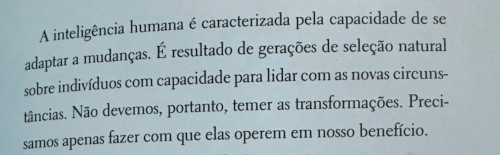

In [40]:
img = cv2.imread('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/trecho-livro.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [41]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



In [42]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.

